In [1]:
from models.mnist_classifier.lenet import LeNet5, LeNet1
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset, ConcatDataset
import random
import os
from  PIL import Image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms,utils,datasets
import numpy as np
from torch import optim
import time
import torchvision.models as models
from pylab import *

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [2]:
data_root = './autodl-tmp/mnist'
data_train = MNIST(data_root,
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.Resize((28, 28)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]))
data_test = MNIST(data_root,
                  train=False,
                  download=True,
                  transform=transforms.Compose([
                       transforms.Resize((28, 28)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]))

In [3]:
len(data_train)

60000

In [4]:
data_train_loader = DataLoader(data_train, batch_size=256, shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=256, num_workers=8)

In [6]:
net = LeNet1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)  #学习率，太高如2e-3会立马收敛，cagfuzz里设置为0.05

In [7]:
epoch = 100

In [8]:
def train(epoch):
    global cur_batch_win
    net.train()
    loss_list, batch_list = [], []
    total_correct = 0
    for i, (images, labels) in enumerate(data_train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()
        # if i % 10 == 0:
            # print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))
        loss.backward()
        optimizer.step()
    avg_loss = sum(loss_list) / len(loss_list)
    acc = float(total_correct) / len(data_train)
    print('Train Avg. Loss: %f, Accuracy: %f' % (avg_loss, acc))
    return acc, avg_loss

In [9]:
def test():
    net.eval()
    batch_list = []
    with torch.no_grad():
        total_correct = 0
        avg_loss = 0.0
        for i, (images, labels) in enumerate(data_test_loader):
            images = images.to(device)
            labels = labels.to(device)
            output = net(images)
            avg_loss += criterion(output, labels).sum()
            pred = output.detach().max(1)[1]
            total_correct += pred.eq(labels.view_as(pred)).sum()
            batch_list.append(i+1)

    avg_loss /= batch_list[-1]
    avg_loss = avg_loss.detach().cpu().item()
    acc = float(total_correct) / len(data_test)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss, acc))
    return acc, avg_loss

In [10]:
def train_and_test(epoch):
    print('training...')
    acc, loss = train(epoch)
    val_acc, val_loss = test()
    return acc, loss, val_acc, val_loss

In [11]:
acc, loss, val_acc, val_loss = [], [], [], []

for e in range(epoch):
    a, b, c, d = train_and_test(e)
    acc.append(a)
    loss.append(b)
    val_acc.append(c)
    val_loss.append(d)
    print(f'lenet_epoch={e} test_acc={c:0.3f}')
    #if e % 2 == 0:
     #   torch.save(net.state_dict(), f'autodl-tmp/save_model/mnist/Lenet5/lenet_epoch={e}_test_acc={acc:0.3f}.pth')
#    torch.save(net.state_dict(), f'autodl-tmp/save_model/fashion/Lenet1/lenet_epoch={e}_test_acc={acc:0.3f}.pth')

training...
Train Avg. Loss: 2.088921, Accuracy: 0.361183
Test Avg. Loss: 1.710006, Accuracy: 0.655700
lenet_epoch=0 test_acc=0.656
training...
Train Avg. Loss: 1.329321, Accuracy: 0.728833
Test Avg. Loss: 0.997164, Accuracy: 0.784900
lenet_epoch=1 test_acc=0.785
training...
Train Avg. Loss: 0.869333, Accuracy: 0.799800
Test Avg. Loss: 0.721244, Accuracy: 0.829800
lenet_epoch=2 test_acc=0.830
training...
Train Avg. Loss: 0.678908, Accuracy: 0.833333
Test Avg. Loss: 0.589118, Accuracy: 0.855200
lenet_epoch=3 test_acc=0.855
training...
Train Avg. Loss: 0.577181, Accuracy: 0.852933
Test Avg. Loss: 0.509800, Accuracy: 0.869600
lenet_epoch=4 test_acc=0.870
training...
Train Avg. Loss: 0.510897, Accuracy: 0.866967
Test Avg. Loss: 0.455784, Accuracy: 0.881100
lenet_epoch=5 test_acc=0.881
training...
Train Avg. Loss: 0.464181, Accuracy: 0.877450
Test Avg. Loss: 0.416168, Accuracy: 0.890000
lenet_epoch=6 test_acc=0.890
training...
Train Avg. Loss: 0.429078, Accuracy: 0.884850
Test Avg. Loss: 0.

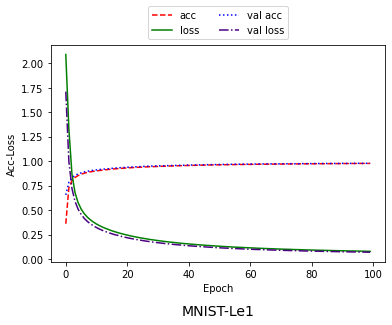

In [27]:
x = np.arange(epoch)
plt.plot(x, acc, color='red', linestyle='--', label="acc")
plt.plot(x, loss, color='green', label="loss")
plt.plot(x, val_acc, color='blue', linestyle='dotted', label="val acc")
plt.plot(x, val_loss, color='indigo', linestyle='dashdot', label="val loss")
plt.title('MNIST-Le1', fontsize=14, y=-0.27)
plt.xlabel('Epoch')
plt.ylabel('Acc-Loss')
plt.xticks(ticks=[0,20,40,60,80,100])
# 添加图例
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.1),ncol=2)
plt.show()

In [29]:
val_acc

[0.6557,
 0.7849,
 0.8298,
 0.8552,
 0.8696,
 0.8811,
 0.89,
 0.8965,
 0.9027,
 0.9074,
 0.911,
 0.915,
 0.9177,
 0.921,
 0.9233,
 0.9269,
 0.9299,
 0.9319,
 0.9347,
 0.936,
 0.9379,
 0.9397,
 0.9408,
 0.9431,
 0.9447,
 0.9464,
 0.9477,
 0.9497,
 0.9501,
 0.9515,
 0.9516,
 0.953,
 0.9534,
 0.9547,
 0.9555,
 0.9559,
 0.9567,
 0.9576,
 0.958,
 0.959,
 0.9603,
 0.9608,
 0.9614,
 0.9621,
 0.9627,
 0.9638,
 0.9646,
 0.9647,
 0.9659,
 0.9655,
 0.9665,
 0.9665,
 0.9674,
 0.9675,
 0.9683,
 0.969,
 0.9691,
 0.9692,
 0.9696,
 0.9701,
 0.9708,
 0.971,
 0.9711,
 0.9714,
 0.9719,
 0.9725,
 0.9722,
 0.9728,
 0.9727,
 0.973,
 0.9733,
 0.9737,
 0.9741,
 0.9744,
 0.9743,
 0.9738,
 0.9748,
 0.9754,
 0.9754,
 0.9755,
 0.9753,
 0.9761,
 0.976,
 0.9765,
 0.976,
 0.9766,
 0.9769,
 0.9765,
 0.9768,
 0.977,
 0.9778,
 0.977,
 0.9775,
 0.9773,
 0.9782,
 0.9783,
 0.9781,
 0.9783,
 0.9783,
 0.9787]

In [30]:
val_loss

[1.7100056409835815,
 0.9971640706062317,
 0.721243679523468,
 0.589118480682373,
 0.5097996592521667,
 0.45578432083129883,
 0.4161677956581116,
 0.38496947288513184,
 0.3607056438922882,
 0.33923986554145813,
 0.32168257236480713,
 0.3062794804573059,
 0.29210230708122253,
 0.2800903022289276,
 0.26880359649658203,
 0.2586222290992737,
 0.2491549551486969,
 0.24188180267810822,
 0.23277416825294495,
 0.2250174582004547,
 0.21805249154567719,
 0.21178355813026428,
 0.20542214810848236,
 0.2000395804643631,
 0.1948394626379013,
 0.1894795000553131,
 0.18442454934120178,
 0.17984415590763092,
 0.1752290576696396,
 0.17110173404216766,
 0.16749612987041473,
 0.16399066150188446,
 0.159885436296463,
 0.15699586272239685,
 0.15367893874645233,
 0.15031227469444275,
 0.14732448756694794,
 0.1449839472770691,
 0.1419285237789154,
 0.13913868367671967,
 0.13650570809841156,
 0.13415022194385529,
 0.13182556629180908,
 0.1294068545103073,
 0.12792915105819702,
 0.12510210275650024,
 0.12314166

In [31]:
acc

[0.36118333333333336,
 0.7288333333333333,
 0.7998,
 0.8333333333333334,
 0.8529333333333333,
 0.8669666666666667,
 0.87745,
 0.88485,
 0.8911833333333333,
 0.8964666666666666,
 0.90105,
 0.9051,
 0.9091333333333333,
 0.9124333333333333,
 0.9158833333333334,
 0.9189166666666667,
 0.9218333333333333,
 0.9241666666666667,
 0.9267166666666666,
 0.9289,
 0.9311666666666667,
 0.93295,
 0.9348333333333333,
 0.9363333333333334,
 0.9379333333333333,
 0.9399333333333333,
 0.9412,
 0.9429166666666666,
 0.9437333333333333,
 0.9451666666666667,
 0.9461,
 0.9477166666666667,
 0.9484166666666667,
 0.94975,
 0.9507833333333333,
 0.9518833333333333,
 0.9529166666666666,
 0.9537166666666667,
 0.9549,
 0.9553333333333334,
 0.95615,
 0.9570333333333333,
 0.9576166666666667,
 0.9586,
 0.9590833333333333,
 0.9598166666666667,
 0.96035,
 0.961,
 0.9619666666666666,
 0.9623,
 0.9628,
 0.9635,
 0.9639666666666666,
 0.9645,
 0.9649833333333333,
 0.9653,
 0.9659833333333333,
 0.9663833333333334,
 0.966566666666

In [32]:
loss

[2.088920597827181,
 1.3293205634076544,
 0.8693325527170871,
 0.6789082151778201,
 0.5771806366900181,
 0.510897177965083,
 0.46418136916262037,
 0.4290776661101808,
 0.40098398112236183,
 0.3777357157240523,
 0.35838204888587305,
 0.3411328555421626,
 0.3259762613063163,
 0.3130909794822652,
 0.3007724209034697,
 0.2892808836825351,
 0.27914095184904464,
 0.2696934602996136,
 0.2608464593582965,
 0.25301243516993016,
 0.2453361688776219,
 0.23793249041476147,
 0.23117895418025078,
 0.22497987499896516,
 0.2188756467180049,
 0.21332615214459438,
 0.20828516090169866,
 0.20257735972074753,
 0.19795851961095282,
 0.19358160270655408,
 0.18911317336432476,
 0.18514037360536292,
 0.18091055186505015,
 0.17734369489740817,
 0.17342467783613408,
 0.17038358094844414,
 0.16702729964509924,
 0.16356032639741896,
 0.16048521076111083,
 0.15755306799361046,
 0.15498553647639904,
 0.15206337409450651,
 0.14938025186036497,
 0.14705245532888048,
 0.14431189834437472,
 0.14226945077485226,
 0.1398

In [16]:
from models.mnist_classifier.lenet import LeNet5, LeNet1
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from tqdm import tqdm
import matplotlib.pyplot as plt
 
# 加载数据集
train_dataset = datasets.MNIST(root='./autodl-tmp/mnist', train=True, transform=transforms.ToTensor(), download=False)
test_dataset = datasets.MNIST(root='./autodl-tmp/mnist', train=False, transform=transforms.ToTensor(), download=False)
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [17]:
# 定义网络结构
class LeNet(nn.Module):
    def __init__(self, in_channel, out_channel):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channel, 6, kernel_size=5, padding=2)
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(400, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84, out_channel)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h1 = self.relu(self.conv1(x))
        h2 = self.avgpool1(h1)
        h3 = self.relu(self.conv2(h2))
        h4 = self.avgpool2(h3)
        h5 = self.relu(self.linear1(self.flatten(h4)))
        h6 = self.relu(self.linear2(h5))
        h7 = self.linear3(h6)
        return h7

100%|██████████| 235/235 [00:04<00:00, 48.86it/s]


epoch:0, train_loss:1.7331313171285263, train_acc:0.5444166666666667


100%|██████████| 40/40 [00:00<00:00, 53.93it/s]


test_loss:0.7761695556342602, test_acc:0.7885


100%|██████████| 235/235 [00:04<00:00, 47.78it/s]


epoch:1, train_loss:0.6065840557534644, train_acc:0.8222666666666667


100%|██████████| 40/40 [00:00<00:00, 54.80it/s]


test_loss:0.48024301752448084, test_acc:0.859


100%|██████████| 235/235 [00:04<00:00, 50.24it/s]


epoch:2, train_loss:0.459442330294467, train_acc:0.8651166666666666


100%|██████████| 40/40 [00:00<00:00, 56.75it/s]


test_loss:0.401952818967402, test_acc:0.8827


100%|██████████| 235/235 [00:04<00:00, 48.21it/s]


epoch:3, train_loss:0.3939485376185559, train_acc:0.884


100%|██████████| 40/40 [00:00<00:00, 56.51it/s]


test_loss:0.35894947005435823, test_acc:0.8933


100%|██████████| 235/235 [00:04<00:00, 49.04it/s]


epoch:4, train_loss:0.34973269770754145, train_acc:0.89655


100%|██████████| 40/40 [00:00<00:00, 55.90it/s]


test_loss:0.3167864385060966, test_acc:0.9079


100%|██████████| 235/235 [00:04<00:00, 49.27it/s]


epoch:5, train_loss:0.3149649341689779, train_acc:0.90665


100%|██████████| 40/40 [00:00<00:00, 56.23it/s]


test_loss:0.28234746064990757, test_acc:0.9165


100%|██████████| 235/235 [00:04<00:00, 48.03it/s]


epoch:6, train_loss:0.2877510447451409, train_acc:0.9141166666666667


100%|██████████| 40/40 [00:00<00:00, 56.53it/s]


test_loss:0.2575010961387306, test_acc:0.9239


100%|██████████| 235/235 [00:04<00:00, 48.92it/s]


epoch:7, train_loss:0.2636949787748621, train_acc:0.9204666666666667


100%|██████████| 40/40 [00:00<00:00, 52.85it/s]


test_loss:0.23183038849383591, test_acc:0.9288


100%|██████████| 235/235 [00:04<00:00, 48.20it/s]


epoch:8, train_loss:0.24197583762889213, train_acc:0.9275166666666667


100%|██████████| 40/40 [00:00<00:00, 56.71it/s]


test_loss:0.21056975671090186, test_acc:0.9346


100%|██████████| 235/235 [00:04<00:00, 49.82it/s]


epoch:9, train_loss:0.22178756651726175, train_acc:0.9326333333333333


100%|██████████| 40/40 [00:00<00:00, 56.97it/s]


test_loss:0.1960402879398316, test_acc:0.942


100%|██████████| 235/235 [00:04<00:00, 49.89it/s]


epoch:10, train_loss:0.20489905945798184, train_acc:0.9384166666666667


100%|██████████| 40/40 [00:00<00:00, 57.47it/s]


test_loss:0.1766570304520428, test_acc:0.9479


100%|██████████| 235/235 [00:04<00:00, 48.31it/s]


epoch:11, train_loss:0.18997144439118974, train_acc:0.94245


100%|██████████| 40/40 [00:00<00:00, 54.74it/s]


test_loss:0.16610681340098382, test_acc:0.9513


100%|██████████| 235/235 [00:04<00:00, 48.65it/s]


epoch:12, train_loss:0.1760029307705291, train_acc:0.94685


100%|██████████| 40/40 [00:00<00:00, 56.58it/s]


test_loss:0.1550240797922015, test_acc:0.955


100%|██████████| 235/235 [00:04<00:00, 49.70it/s]


epoch:13, train_loss:0.16345664262771606, train_acc:0.9505333333333333


100%|██████████| 40/40 [00:00<00:00, 58.18it/s]


test_loss:0.1454039342235774, test_acc:0.9578


100%|██████████| 235/235 [00:04<00:00, 49.26it/s]


epoch:14, train_loss:0.152985421710826, train_acc:0.9540166666666666


100%|██████████| 40/40 [00:00<00:00, 54.32it/s]


test_loss:0.13280494243372232, test_acc:0.9606


100%|██████████| 235/235 [00:04<00:00, 48.92it/s]


epoch:15, train_loss:0.14404338314495188, train_acc:0.9569666666666666


100%|██████████| 40/40 [00:00<00:00, 55.61it/s]


test_loss:0.12336727832444012, test_acc:0.9629


100%|██████████| 235/235 [00:04<00:00, 48.04it/s]


epoch:16, train_loss:0.13539149705716905, train_acc:0.9585166666666667


100%|██████████| 40/40 [00:00<00:00, 56.26it/s]


test_loss:0.11874700302723795, test_acc:0.9652


100%|██████████| 235/235 [00:04<00:00, 49.35it/s]


epoch:17, train_loss:0.12729811352935244, train_acc:0.9613666666666667


100%|██████████| 40/40 [00:00<00:00, 56.04it/s]


test_loss:0.11633580676279962, test_acc:0.9669


100%|██████████| 235/235 [00:04<00:00, 49.14it/s]


epoch:18, train_loss:0.12095011009814892, train_acc:0.96325


100%|██████████| 40/40 [00:00<00:00, 56.34it/s]


test_loss:0.10109897368820384, test_acc:0.9705


100%|██████████| 235/235 [00:04<00:00, 48.82it/s]


epoch:19, train_loss:0.11501996330124267, train_acc:0.96465


100%|██████████| 40/40 [00:00<00:00, 57.56it/s]


test_loss:0.10057370872236789, test_acc:0.97


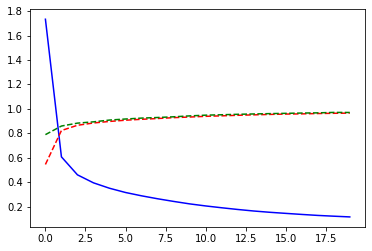

In [18]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
lenet = LeNet(1, 10).to(device)
# 定义超参数
epochs = 20
lr = 1e-4
# 定义优化器
optimizer = torch.optim.Adam(lenet.parameters(), lr=lr)
# 定义损失函数
loss_fn = nn.CrossEntropyLoss()
 
# 训练
train_acc_list = []
test_acc_list = []
train_loss_list = []
for epoch in range(epochs):
    train_loss_epoch = []
    acc = 0
    for train_data, labels in tqdm(train_dataloader):
        # train_data.shape: bt * 1 * 28 * 28
        train_data = train_data.to(device)
        labels = labels.to(device)
        y_hat = lenet(train_data)
        train_loss = loss_fn(y_hat, labels)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        train_loss_epoch.append(train_loss.cpu().detach().numpy())
        right = torch.argmax(y_hat, 1) == labels 
        acc += right.sum().cpu().detach().numpy()
    acc = acc / len(train_dataset)
    train_acc_list.append(acc)
    train_loss_list.append(sum(train_loss_epoch) / len(train_loss_epoch))
    print(f'epoch:{epoch}, train_loss:{sum(train_loss_epoch) / len(train_loss_epoch)}, train_acc:{acc}')
    
    test_loss_epoch = []
    acc = 0
    with torch.no_grad():
        for test_data, labels in tqdm(test_dataloader):
            test_data = test_data.to(device)
            labels = labels.to(device)
            y_hat = lenet(test_data)
            test_loss = loss_fn(y_hat, labels)
            test_loss_epoch.append(test_loss.cpu().detach().numpy())
            right = torch.argmax(y_hat, 1) == labels 
            acc += right.sum().cpu().detach().numpy()
        acc = acc / len(test_dataset)
        test_acc_list.append(acc)
        print(f'test_loss:{sum(test_loss_epoch) / len(test_loss_epoch)}, test_acc:{acc}')
x = range(epochs)
plt.plot(x, train_loss_list, color = 'blue')
plt.plot(x, train_acc_list, color='red', linestyle='--')
plt.plot(x, test_acc_list, color='green', linestyle='--')
plt.show()